Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64
No of Versicolor in Dataset: 50
No of setosa in dataset: 50
No of virginica in dataset: 50


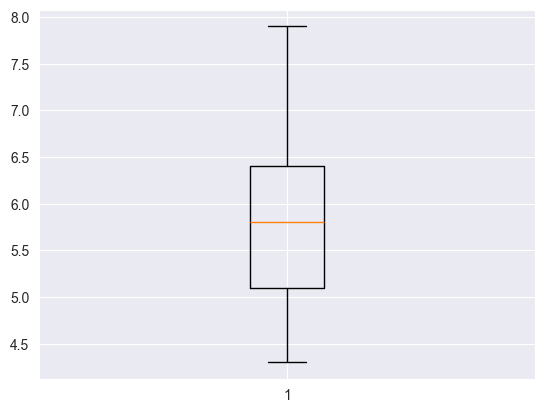

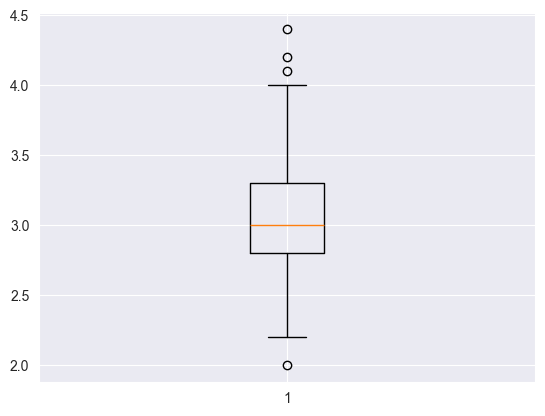

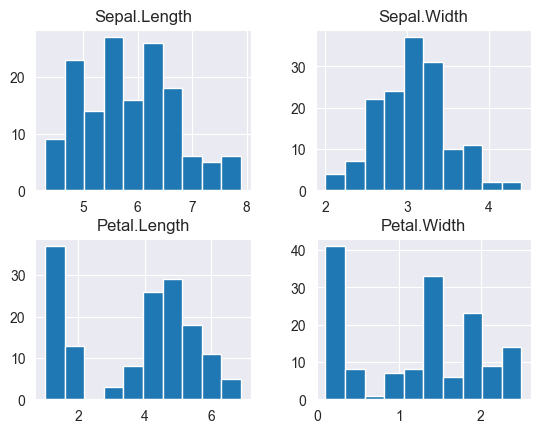

<Figure size 1000x700 with 0 Axes>

(105, 5)
(45, 5)
Accuracy (Logistic Regression): 0.9333333333333333
Confusion matrix (Logistic Regression): 
 [[17  0  0]
 [ 0 14  2]
 [ 0  1 11]]
Accuracy (SVM): 0.9555555555555556
Accuracy (KNN): 0.9333333333333333
Accuracy (Naive Bayes): 0.9555555555555556
Epoch 1/150


C:\Users\harib\PycharmProjects\Flask\BharathIntern\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3093 - loss: 2.0916  
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - accuracy: 0.3277 - loss: 1.7302
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.1387 - loss: 1.5570
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - accuracy: 0.3271 - loss: 1.2917
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.1552 - loss: 1.2175
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.0543 - loss: 1.1265   
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.2215 - loss: 1.0518   
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.4101 - loss: 1.0275
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.6128 - loss: 1.0260
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.5231 - loss: 1.0178
Epoch 11/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.4561 - loss: 1.0016
Epoch 12/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 821u

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Load the iris dataset
iris = pd.read_csv('iris (1).csv')

# Check for null values
print(iris.isnull().sum())

# Drop the unnecessary column
iris = iris.drop('Unnamed: 0', axis=1)

# Count the number of samples for each species
n = len(iris[iris['Species'] == 'versicolor'])
print("No of Versicolor in Dataset:", n)

n1 = len(iris[iris['Species'] == 'setosa'])
print("No of setosa in dataset:", n1)

n2 = len(iris[iris['Species'] == 'virginica'])
print("No of virginica in dataset:", n2)

# Check for outliers using boxplots
plt.figure(1)
plt.boxplot([iris['Sepal.Length']])
plt.figure(2)
plt.boxplot([iris['Sepal.Width']])
plt.show()

# Plot histograms
iris.hist()
plt.figure(figsize=(10, 7))
plt.show()

# Split the data into train and test sets
train, test = train_test_split(iris, test_size=0.3)
print(train.shape)
print(test.shape)

train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
test_y = test.Species

# Logistic Regression
model1 = LogisticRegression()
model1.fit(train_X, train_y)
prediction = model1.predict(test_X)
print('Accuracy (Logistic Regression):', metrics.accuracy_score(prediction, test_y))

# Confusion matrix for Logistic Regression
confusion_mat = confusion_matrix(test_y, prediction)
print("Confusion matrix (Logistic Regression): \n", confusion_mat)

# Support Vector Machines
model2 = svm.SVC()
model2.fit(train_X, train_y)
pred_y = model2.predict(test_X)
print("Accuracy (SVM):", accuracy_score(test_y, pred_y))

# K-Nearest Neighbors
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(train_X, train_y)
y_pred2 = model3.predict(test_X)
print("Accuracy (KNN):", accuracy_score(test_y, y_pred2))

# Naive Bayes
model4 = GaussianNB()
model4.fit(train_X, train_y)
y_pred3 = model4.predict(test_X)
print("Accuracy (Naive Bayes):", accuracy_score(test_y, y_pred3))

# Encode the target variable
encoder = LabelEncoder()
encoder.fit(train_y)
train_y_encoded = encoder.transform(train_y)
test_y_encoded = encoder.transform(test_y)

# One-hot encode the labels
train_y_encoded = to_categorical(train_y_encoded)
test_y_encoded = to_categorical(test_y_encoded)

# Build the TensorFlow model
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_X, train_y_encoded, epochs=150, batch_size=10, verbose=1)

# Evaluate the model
_, accuracy = model.evaluate(test_X, test_y_encoded)
print('Accuracy (TensorFlow): %.2f' % (accuracy*100))

# Predict and evaluate
y_pred_tf = model.predict(test_X)
y_pred_tf_classes = np.argmax(y_pred_tf, axis=1)
test_y_classes = np.argmax(test_y_encoded, axis=1)
print("Accuracy Score (TensorFlow):", accuracy_score(test_y_classes, y_pred_tf_classes))

# Prepare the new results row
new_result = pd.DataFrame({
    'Model': ['TensorFlow Neural Network'],
    'Score': [accuracy]
})

# Concatenate the new result with the existing results DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Naive Bayes'],
    'Score': [metrics.accuracy_score(prediction, test_y), accuracy_score(test_y, pred_y), 
              accuracy_score(test_y, y_pred2), accuracy_score(test_y, y_pred3)]
})

results = pd.concat([results, new_result], ignore_index=True)

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df.head(9))


Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64
No of Versicolor in Dataset: 50
No of setosa in dataset: 50
No of virginica in dataset: 50


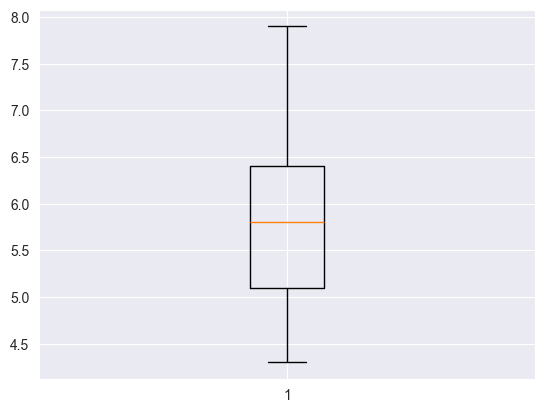

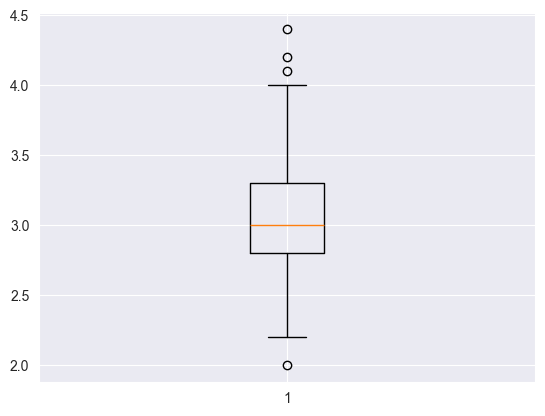

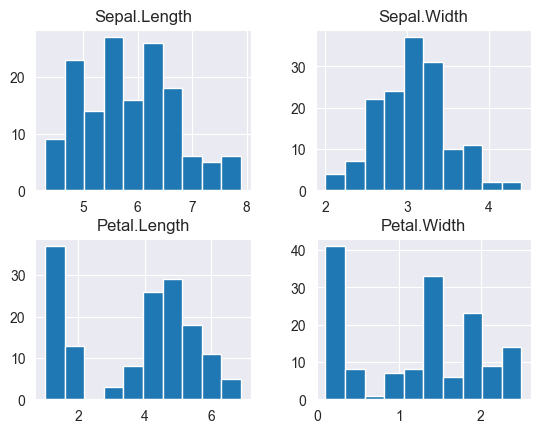

<Figure size 1000x700 with 0 Axes>

(105, 5)
(45, 5)
Accuracy (Logistic Regression): 0.9777777777777777
Confusion matrix (Logistic Regression): 
 [[18  0  0]
 [ 0 15  0]
 [ 0  1 11]]
Accuracy (SVM): 0.9777777777777777
Accuracy (KNN): 0.9555555555555556
Accuracy (Naive Bayes): 0.9777777777777777
                            Model
Score                            
0.977778      Logistic Regression
0.977778  Support Vector Machines
0.977778              Naive Bayes
0.955556                      KNN
Epoch 1/150


C:\Users\harib\PycharmProjects\Flask\BharathIntern\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3489 - loss: 1.1569  
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - accuracy: 0.3459 - loss: 1.1157
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.3317 - loss: 1.0777
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.3245 - loss: 1.0709
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.3525 - loss: 1.0417
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.3121 - loss: 1.0336
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.3785 - loss: 0.9987
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.3505 - loss: 0.9593
Epoch 9/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.2751 - loss: 0.9332
Epoch 10/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.2545 - loss: 0.8971
Epoch 11/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.4869 - loss: 0.8631
Epoch 12/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step

AttributeError: 'DataFrame' object has no attribute 'append'